<h1>Comparar 3 algoritmos de agrupamiento.</h1>

In [9]:
#Importar las librerias que nos van a ayudar aplicar los algortmos.
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [10]:
#leer los datos. Como es una prueba para los no iniciados hay que saber que resultados vamos a esperar, además no seria un
#estudio de "machine learning" sino utilizramos los datos de la matriz iris.
#Yo los voy a leer con pandas, pero igual podemos importarlos de scikit learn.

matriz = pd.read_csv("iris.csv", index_col="Indice")

In [11]:
#Revisemos la matriz que hayamos subido. 
print("\nTamaño de la matriz: \n ", matriz.shape )
print("\nPrimeras filas de la matriz: \n ",  matriz.head() )
#Cuantificar la cantidad de datos perdidos para determinar si los eliminamos, rellenamos, etc.
print("\nCantidad de datos faltantes: \n ", matriz.isnull().sum()  )
print("\nCantidad de datos faltantes en porcentaje \n", matriz.isnull().sum()/matriz.shape[0]*100)
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", matriz.info() )
#Revisar algunas estadisticas basicas.
print("\nEstadisticas basicas: \n ", matriz.describe() )


Tamaño de la matriz: 
  (150, 5)

Primeras filas de la matriz: 
          Sepal_length  Sepal_width  Petal_length  Petal_width  Categoria
Indice                                                                 
0                5.1          3.5           1.4          0.2          1
1                4.9          3.0           1.4          0.2          1
2                4.7          3.2           1.3          0.2          1
3                4.6          3.1           1.5          0.2          1
4                5.0          3.6           1.4          0.2          1

Cantidad de datos faltantes: 
  Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Categoria       0
dtype: int64

Cantidad de datos faltantes en porcentaje 
 Sepal_length    0.0
Sepal_width     0.0
Petal_length    0.0
Petal_width     0.0
Categoria       0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null C

array([[<AxesSubplot:title={'center':'Sepal_length'}>,
        <AxesSubplot:title={'center':'Sepal_width'}>],
       [<AxesSubplot:title={'center':'Petal_length'}>,
        <AxesSubplot:title={'center':'Petal_width'}>],
       [<AxesSubplot:title={'center':'Categoria'}>, <AxesSubplot:>]],
      dtype=object)

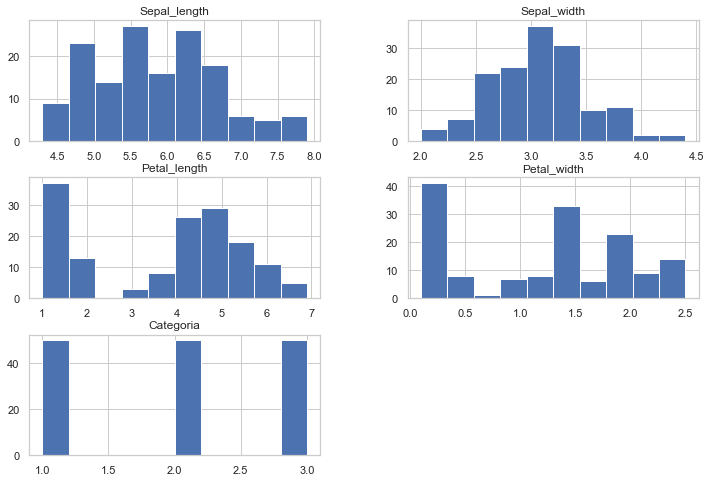

In [12]:
#Mirar la forma de las variables nos ayuda a percibir ciertas cosas como si la curva es normal, el sesgo, estacionalidad en 
#los casos de series de tiempo, correlación etc. 
matriz.hist( figsize=(12,8) )

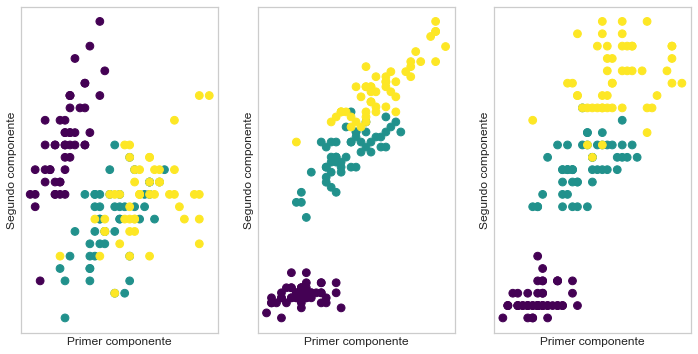

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), subplot_kw={'xticks': (), 'yticks': ()})
for i,ax in enumerate(axes):    
    ax.scatter(matriz.iloc[:, 0], matriz.iloc[:, i+1], c=matriz.Categoria, cmap="viridis", s=60)
    #ax.set_title("{} : {:.2f}".format(matriz))
    ax.set_xlabel("Primer componente")
    ax.set_ylabel("Segundo componente")

In [14]:
#Hay que separar la matriz de datos de las categorias. Después hay que comparar el resultado de los algortimos con los datos
#que ya sabemos son los correctos.
matriz_datos = matriz.iloc[:,:4]
print("\n Tamaño de la nueva matriz de datos\n", matriz_datos.shape)
print("\n Primeras filas de la nueva matriz\n", matriz_datos.head())



 Tamaño de la nueva matriz de datos
 (150, 4)

 Primeras filas de la nueva matriz
         Sepal_length  Sepal_width  Petal_length  Petal_width
Indice                                                      
0                5.1          3.5           1.4          0.2
1                4.9          3.0           1.4          0.2
2                4.7          3.2           1.3          0.2
3                4.6          3.1           1.5          0.2
4                5.0          3.6           1.4          0.2


In [15]:
#Al ser una matriz de juguete con esta aplicaión del algoritmo si que nos ayuda a separar los resultados como esperabamos,
#incluso el algoritmo dbscan que no recibio el numero de grupos de antemano los alcanza a ver. 

#Primero hay que centrar los datos para que elalgoritmo de pca funcione optimamente.
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
for columna in matriz_datos.columns:
    matriz_datos[columna] = scalar.fit_transform(matriz_datos[[columna]])
print("\nMatriz con datos dentrados: \n ", matriz_datos.head(2) )
print("\nTipos de variables de la nueva matriz con datos centrados: \n ", matriz_datos.info())


#Bueno reduzcamos la matriz con PCA para poder utilizar solo dos columnas.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(matriz_datos.values)
pcaEscalarReducido = pca.transform(matriz_datos.values)
print("Dimensiones originales: {}".format(str(matriz.shape)))
print("Dimensiones reducidas: {}".format(str(pcaEscalarReducido.shape)))
matriz_pca = pd.DataFrame (pcaEscalarReducido , columns=["pc1","pc2"])
print("\nMatriz reducida por medio de pca: \n ", matriz_pca.head(2) )
print("\nTipos de variables de la nueva matriz con pca: \n ", matriz_pca.info())


Matriz con datos dentrados: 
          Sepal_length  Sepal_width  Petal_length  Petal_width
Indice                                                      
0          -0.900681     1.019004     -1.340227    -1.315444
1          -1.143017    -0.131979     -1.340227    -1.315444
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB

Tipos de variables de la nueva matriz con datos centrados: 
  None
Dimensiones originales: (150, 5)
Dimensiones reducidas: (150, 2)

Matriz reducida por medio de pca: 
          pc1       pc2
0 -2.264703  0.480027
1 -2.080961 -0.674134
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns 

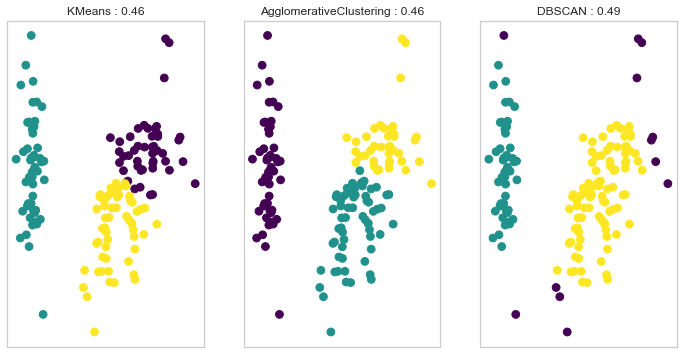

In [16]:
#Apliquemos los algoritmos a esa matriz.
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
fig, axes = plt.subplots(1, 3, figsize=(12, 6),subplot_kw={'xticks': (), 'yticks': ()})
algoritmos = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),DBSCAN()]
for ax, algoritmo in zip(axes, algoritmos):
    grupos = algoritmo.fit_predict(matriz_pca)
    df_grupos = pd.DataFrame( grupos, columns= ["Categorias"])
    df_matriz = pd.merge(matriz_pca, df_grupos, left_index= True, right_index= True, how = "inner")
    df_matriz.to_csv("iris_{}.csv".format(algoritmo))
    ax.scatter(matriz_pca.iloc[:, 0], matriz_pca.iloc[:, 1], c=grupos, cmap="viridis", s=60)
    ax.set_title("{} : {:.2f}".format(algoritmo.__class__.__name__,silhouette_score(matriz_datos, grupos)))
